In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = '/Users/patrick/Desktop/Lighthouse_labs/Data Projects/National-Collision-Database-Analysis/dataset/y_2017_en.xlsx'
data = pd.read_excel(data)
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2017,1,1,10,2,1,2,3,1,3,...,1,UUUU,1,M,75,11,2,NN,1,2456013
1,2017,1,1,12,2,1,4,UU,1,5,...,1,UUUU,1,F,21,11,2,2,1,2456022
2,2017,1,1,0,2,1,3,UU,7,3,...,1,UUUU,1,F,34,11,2,2,1,2456061
3,2017,1,1,17,2,2,21,UU,1,1,...,1,UUUU,1,F,50,11,2,2,1,2456167
4,2017,1,1,17,2,2,21,UU,1,1,...,1,UUUU,1,M,63,11,1,NN,1,2456167


In [88]:
data.describe()

,C_YEAR,C_SEV,C_CASE
count,289823.0,289823.000000,2.898230e+05
mean,2017.0,1.984528,2.512741e+06
std,0.0,0.123419,3.293930e+04
min,2017.0,1.000000,2.455891e+06
25%,2017.0,2.000000,2.484745e+06
50%,2017.0,2.000000,2.512108e+06
75%,2017.0,2.000000,2.541550e+06
max,2017.0,2.000000,2.570302e+06


**Question 2: Using Excel (Pivot Tables/Charts), or any other analytical tool of your choice, generate reports/charts to answer the following questions:**

What age range and which sex are more likely to be associated with a collision?\
What time(s) of days are most associated with a relatively high fatality rate?\
What type(s) of weather are most associated with a relatively high fatality rate?\
What is the effect of using a Safety device on the fatality rate?\
Use the previous charts/reports and perform additional ad hoc analysis of the dataset to outline the key contributing factors to Canadian collisions.

**2.1 What age range and which sex are more likely to be associated with a collision?\**

In [89]:
import copy
df = copy.deepcopy(data)

In [90]:
df['P_SEX'].unique()

array(['M', 'F', 'U', 'N'], dtype=object)

In [91]:
df['P_AGE'].unique()

array([75, 21, 34, 50, 63, 26, 20, 80, 35, 37, 45, 32, 38, 60, 25, 19, 27,
       43, 72, 55, 31, 76, 'UU', 51, 46, 42, 58, 59, 56, 41, 36, 48, 39,
       22, 52, 53, 33, 18, 61, 40, 29, 3, 73, 69, 30, 44, 24, 54, 65, 47,
       70, 71, 13, 23, 17, 74, 15, 66, 88, 57, 49, 67, 14, 64, 28, 68, 77,
       62, 1, 8, 2, 11, 9, 16, 89, 85, 84, 4, 6, 81, 12, 5, 7, 78, 79, 93,
       86, 10, 91, 90, 83, 92, 82, 87, 'NN', 99, 98, 97, 96, 94, 95],
      dtype=object)

In [93]:
df['C_SEV'].unique()

array([2, 1])

Classification structure
Classification of age group - Classification structure\
Code	Category\
1	15 to 24 years\
2	25 - 34 years\
3	35 - 44 years\
4	45 - 54 years\
5	55 - 64 years\
6	65 - 74 years\
7	75 years and over\

source: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=252430

In [94]:
# Filter out rows with 'Unknown' values in 'P_SEX' and convert non-numeric 'P_AGE' values to NaN
df = df[df['P_SEX'] != 'U']
df = df[df['P_SEX']!= 'N']
df = df[df['P_AGE']!= 'UU']
df = df[df['P_AGE']!= 'NN']
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors='coerce')

# Filter rows where collision severity is either 1 or 2
collision_df = df[df['C_SEV'].isin([1, 2])]


# Filter rows where collision severity is either 1 or 2
collision_df = df[df['C_SEV'].isin([1, 2])]
# Define Sex Labels for each P_SEX value and replace in df
collision_df['P_SEX'] = collision_df['P_SEX'].replace({'M': 'Male', 'F': 'Female'})
# Define Severity Labels for each C_SEV value and replace in collision_df
collision_df['C_SEV'] = collision_df['C_SEV'].replace({'1': 'At least one fatality', '2': 'Non-Fatal'})

# Define age ranges and corresponding labels
age_ranges = [(0, 14), (15, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 100)]
age_range_labels = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Calculate total collisions for each age range and sex combination
collision_counts = collision_df.groupby(['P_SEX', pd.cut(collision_df['P_AGE'], [age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=age_range_labels)]).size().unstack().fillna(0)

# Calculate proportions of collisions for each age range and sex combination
collision_proportions = collision_counts.div(collision_counts.sum(axis=1), axis=0)

# Find the age range and sex with the highest collision proportion
max_collision_proportion = collision_proportions.stack().max()
max_collision_idx = collision_proportions.stack().idxmax()

print(f"The age range and sex more likely to be associated with a collision:")
print(f"Age Range: {max_collision_idx[1]}, Sex: {max_collision_idx[0]}")
print(f"Collision Proportion: {max_collision_proportion:.2%}")



The age range and sex more likely to be associated with a collision:
Age Range: 15-24, Sex: Female
Collision Proportion: 22.15%


In [95]:
from lets_plot import *
LetsPlot.setup_html()

In [96]:
# get data to plot 
plot_data = collision_proportions.transpose().reset_index(level=0)
plot_data

P_SEX,P_AGE,Female,Male
0,0-14,0.081847,0.071099
1,15-24,0.221457,0.213721
2,25-34,0.183045,0.185339
3,35-44,0.155892,0.153019
4,45-54,0.145812,0.153636
5,55-64,0.110213,0.122564
6,65-74,0.063627,0.063949
7,75+,0.038107,0.036673


In [131]:
# plot plot_data using letsplot

# Create the ggplot visualization
p = ggplot(plot_data, aes(x='P_AGE', y='Female')) + geom_lollipop(stat='identity', shape = 1, color = 'red', size = 3, stroke = 2, linewidth=1) + \
    geom_lollipop(aes(x='P_AGE', y='Male'), stat='identity', position='dodge', width=5, color = 'yellow', linewidth=0.3, offset= 10) + \
        theme_classic() + \
            flavor_high_contrast_dark()
# Display the plot
p

2.2 What time(s) of days are most associated with a relatively high fatality rate?

In [132]:
df = copy.deepcopy(data)

Time of Day Most Associated with High Fatality Rate:
Hour: 3.0, Fatality Rate: 2.82%


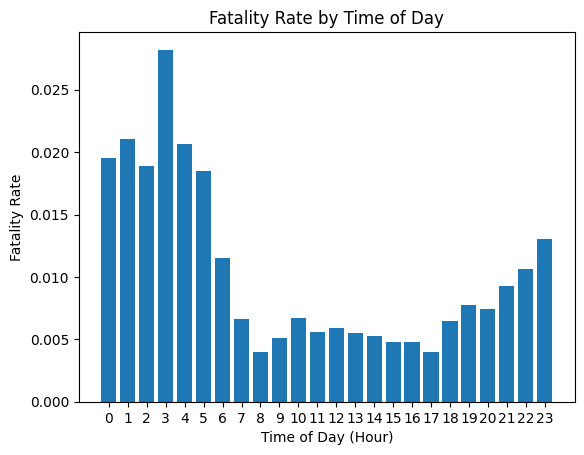

In [134]:
# Convert 'C_HOUR' and 'P_ISEV' columns to numeric
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors='coerce')
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out non-numeric values in 'C_HOUR' and 'P_ISEV'
df = df.dropna(subset=['C_HOUR', 'P_ISEV'])

# Filter rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'C_HOUR' and calculate the fatality rate for each hour
fatality_rate_by_hour = fatality_df.groupby('C_HOUR').size() / df.groupby('C_HOUR').size()

# Plot the fatality rate by hour
plt.bar(fatality_rate_by_hour.index, fatality_rate_by_hour.values)
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Time of Day')
plt.xticks(fatality_rate_by_hour.index)

# Find the hour with the highest fatality rate
max_fatality_rate_hour = fatality_rate_by_hour.idxmax()
max_fatality_rate = fatality_rate_by_hour.max()

print(f"Time of Day Most Associated with High Fatality Rate:")
print(f"Hour: {max_fatality_rate_hour}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()

In [148]:
fatality_rate_by_hour

C_HOUR
0.0     0.019541
1.0     0.021089
2.0     0.018909
3.0     0.028208
4.0     0.020680
5.0     0.018479
6.0     0.011550
7.0     0.006664
8.0     0.003976
9.0     0.005108
10.0    0.006721
11.0    0.005594
12.0    0.005919
13.0    0.005488
14.0    0.005276
15.0    0.004784
16.0    0.004805
17.0    0.003947
18.0    0.006483
19.0    0.007749
20.0    0.007419
21.0    0.009256
22.0    0.010598
23.0    0.013012
dtype: float64

In [159]:
#numpy array to pandas dataframe
fatality_rate_by_hour = pd.DataFrame(fatality_rate_by_hour).reset_index()
fatality_rate_by_hour.head()

,C_HOUR,0
0,0.0,0.019541
1,1.0,0.021089
2,2.0,0.018909
3,3.0,0.028208
4,4.0,0.020680


In [222]:
# plot fatality_rate_by_hour using ggplot

X = fatality_rate_by_hour['C_HOUR']
Y = fatality_rate_by_hour[0]*100
p = ggplot(fatality_rate_by_hour, aes(x=X, y=Y)) + \
    geom_line(color = 'white') + \
    geom_point(color = 'white', size = 3) + \
    labs(x='Hour', y='Fatality rate (%)') + \
theme_classic() + \
    theme(
        axis_text_x = element_text(angle = 0, hjust = 1),
        axis_text_y = element_text(hjust = 1)
    ) + flavor_high_contrast_dark()
p

2.3 What type(s) of weather are most associated with a relatively high fatality rate?

In [192]:
df = copy.deepcopy(data)

In [193]:
# Convert 'C_WTHR' and 'P_ISEV' columns to numeric
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]
# fatality_df['C_WTHR'].replace({1 : 'Dry, normal', 2: 'Wet', 3: 'Snow', 4: 'Slush', 5: 'Icy', 6: 'Sand/gravel', 7: 'Muddy', 8: 'Oil', 9: 'Flooded', 'Q': 'other', 'U': 'Unknown'}, inplace=True)
# Group by 'C_WTHR' and calculate the fatality rate for each weather type
fatality_rate_by_weather = fatality_df.groupby('C_WTHR').size() / df.groupby('C_WTHR').size()

# Plot the fatality rate by weather type
# plt.figure(figsize=(10, 6))
# fatality_rate_by_weather.sort_values(ascending=False).plot(kind='bar')
# plt.xlabel('Weather Type')
# plt.ylabel('Fatality Rate')
# plt.title('Fatality Rate by Weather Type')
# plt.xticks(rotation=45)
# plt.tight_layout()

# Find the weather type with the highest fatality rate
max_fatality_rate_weather = fatality_rate_by_weather.idxmax()
max_fatality_rate = fatality_rate_by_weather.max()

print(f"Weather Type Most Associated with High Fatality Rate:")
print(f"Weather: {max_fatality_rate_weather}, Fatality Rate: {max_fatality_rate:.2%}")

Weather Type Most Associated with High Fatality Rate:
Weather: 6, Fatality Rate: 1.15%


In [194]:
fatality_rate_by_weather =  pd.DataFrame(fatality_rate_by_weather).reset_index()
fatality_rate_by_weather['C_WTHR'].replace({1 : 'Dry', 2: 'Wet', 3: 'Snow', 4: 'Slush', 5: 'Icy', 6: 'Sand/gravel', 7: 'Muddy', 8: 'Oil', 9: 'Flooded', 'Q': 'other', 'U': 'Unknown'}, inplace=True)
fatality_rate_by_weather

,C_WTHR,0
0,Dry,0.006321
1,Wet,0.006669
2,Snow,0.005563
3,Slush,0.006545
4,Icy,0.004231
5,Sand/gravel,0.011474
6,Muddy,0.004020
7,other,0.010417
8,Unknown,0.011333


In [219]:
X = fatality_rate_by_weather['C_WTHR']
Y = fatality_rate_by_weather[0]*100
p = ggplot(fatality_rate_by_weather, aes(x=X, y=Y)) + \
    geom_bar(stat = 'identity', color = 'white', size = 0.5, fill = 'black') + \
    labs(x='Weather', y='Fatality rate (%)') + \
theme_classic() + \
    theme(
        axis_text_x = element_text(angle = 0, hjust = 1),
        axis_text_y = element_text(hjust = 1)
    ) + flavor_high_contrast_dark()
p

2.3 What is the effect of using a Safety device on the fatality rate?

In [223]:
df = copy.deepcopy(data)

Safety Device Most Associated with High Fatality Rate:
Safety Device: 10, Fatality Rate: 12.66%


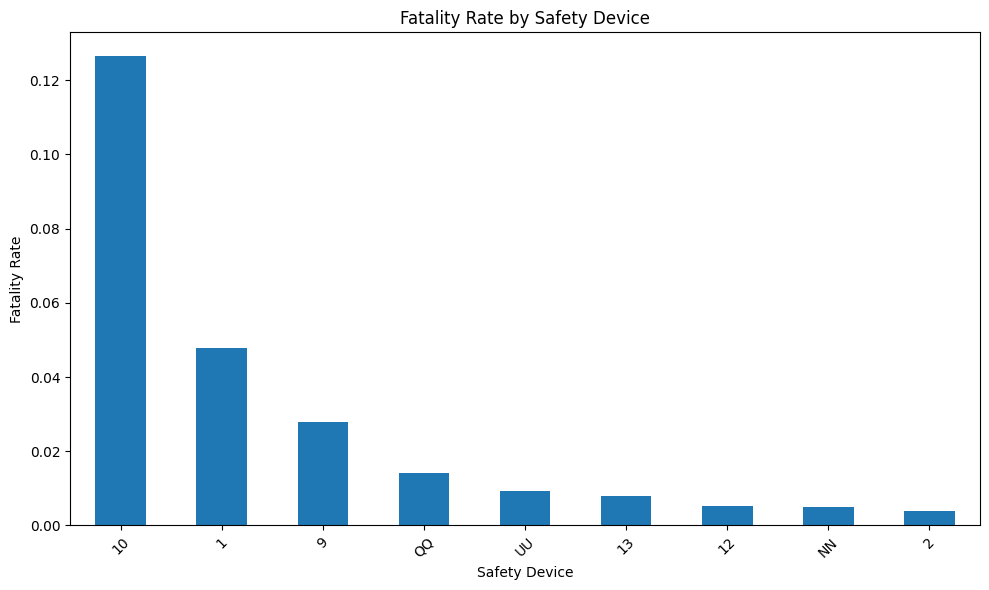

In [224]:
# Convert 'P_SAFE' and 'P_ISEV' columns to numeric
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'P_SAFE' and calculate the fatality rate for each safety device category
fatality_rate_by_safety = fatality_df.groupby('P_SAFE').size() / df.groupby('P_SAFE').size()

# Plot the fatality rate by safety device category
plt.figure(figsize=(10, 6))
fatality_rate_by_safety.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Safety Device')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Safety Device')
plt.xticks(rotation=45)
plt.tight_layout()

# Find the safety device with the highest fatality rate
max_fatality_rate_safety = fatality_rate_by_safety.idxmax()
max_fatality_rate = fatality_rate_by_safety.max()

print(f"Safety Device Most Associated with High Fatality Rate:")
print(f"Safety Device: {max_fatality_rate_safety}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()